<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_141_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [2]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [3]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [4]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [5]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [7]:
# TODO - during class, but please help!
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)   

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [8]:
df.heights.mean()

69.6

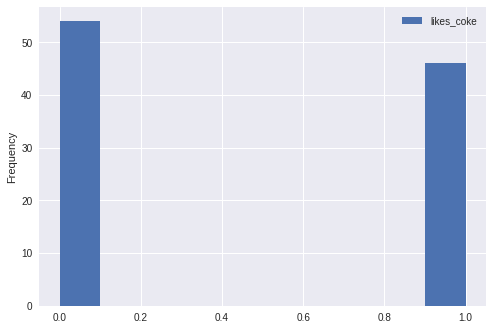

In [68]:
df.plot.hist()

In [61]:
import random
random.seed(10)

population = []
for _ in range(1000):
  population.append(random.randint(0,1))

print(population)
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [71]:
df = pd.DataFrame({'likes_coke':sample})
df['likes_coke'].mean()

0.46

In [62]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
100


In [72]:
import numpy as np

def mean(list):
  avg = np.sum(list) / len(list)
  return avg
print(mean(population))
print(mean(sample))

0.507
0.46


In [79]:
def variance(list):
  return sum(list-mean(list)**2)/(len(list)-1)
  
variance(df['likes_coke'])
df['likes_coke'].var()

0.250909090909091

In [81]:
def stddev(list):
  var = variance(list)
  return var**(0.5)
stddev(df['likes_coke'])

0.5009082659620326

In [83]:
t_stat = (mean(df['likes_coke']) - mean(population)) / (stddev(df['likes_coke']) / len(df['likes_coke'])/len(df['likes_coke'])**0.5)
t_stat
#Try to explain the spread between pop dist and sample dist

-93.82955561680122

In [85]:
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=-0.9382955561680112, pvalue=0.3503760732929039)

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars

In [23]:
# TODO - your code here!
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
columns = {0:'class_name',1:'handicapped_infants',2:'water_project_cost_sharing',3:'adoption_of_the_budget_resolution',
           4:'physician_free_freeze',5:'el_salvador_aid',6:'religious_groups_in_schools',7:'anti_satellite_test_ban',
           8:'aid_to_nicaraguan_contras',9:'mx_missile',10:'immigration',11:'synfuels_corp_cutback',12:'edu_spending',
           13:'superfund_right_to_sue',14:'crime',15:'duty_free_exports',16:'export_admin._act_s.africa'}

#Clean data
df = pd.read_csv(url, header=None, na_values='?')
print(df.shape)
df.head()

(435, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
#Rename columns and change class_name to binary
df = df.rename(columns=columns)
df['class_name'] = (df['class_name']=='republican').astype(int)

In [44]:
#Rename classname to is_republican
df = df.rename(columns={'class_name':'is_republican'})
df.head()

,is_republican,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_free_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_exports,export_admin._act_s.africa
0,1,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,0,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,0,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,0,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [49]:
#Replace n to 0 and y to 1
#df = df.replace(['n','y'],[0,1])
df.head()

,is_republican,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_free_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corp_cutback,edu_spending,superfund_right_to_sue,crime,duty_free_exports,export_admin._act_s.africa
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [50]:
#Check for Null values
df.isna().sum()

is_republican                          0
handicapped_infants                   12
water_project_cost_sharing            48
adoption_of_the_budget_resolution     11
physician_free_freeze                 11
el_salvador_aid                       15
religious_groups_in_schools           11
anti_satellite_test_ban               14
aid_to_nicaraguan_contras             15
mx_missile                            22
immigration                            7
synfuels_corp_cutback                 21
edu_spending                          31
superfund_right_to_sue                25
crime                                 17
duty_free_exports                     28
export_admin._act_s.africa           104
dtype: int64

In [55]:
#Check for number of unique values
df.nunique()

is_republican                        2
handicapped_infants                  2
water_project_cost_sharing           2
adoption_of_the_budget_resolution    2
physician_free_freeze                2
el_salvador_aid                      2
religious_groups_in_schools          2
anti_satellite_test_ban              2
aid_to_nicaraguan_contras            2
mx_missile                           2
immigration                          2
synfuels_corp_cutback                2
edu_spending                         2
superfund_right_to_sue               2
crime                                2
duty_free_exports                    2
export_admin._act_s.africa           2
dtype: int64

In [150]:
#Copy df and drop null values in immigration
df_im = df.copy()
df_im = df_im.drop(df_im.columns.difference(['is_republican', 'immigration']),1).dropna()
df_im.head()

,is_republican,immigration
0,1,1.0
1,1,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [126]:
ct_im = pd.crosstab(df_im['is_republican'], df_im['immigration'])
ct_im

immigration,0.0,1.0
is_republican,,
0,139,124
1,73,92


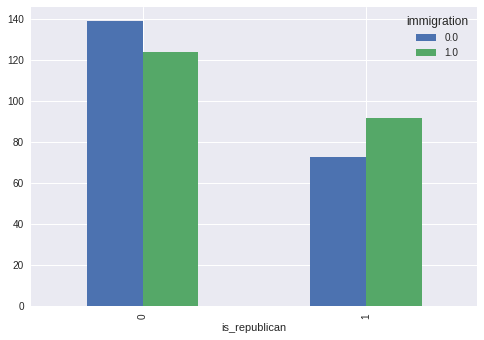

In [127]:
ct_im.plot.bar()

In [0]:
sample_im = df_im.sample(n=100)


In [162]:
import numpy as np
import random
import scipy

def mean(list):
  average = np.sum(list)/len(list)
  return average

print('Population Mean of republican voted for immigration:', df_im.mean())
print('Sample Mean of republican voted for immigration:', sample_im.mean())

Population Mean of republican voted for immigration: is_republican    0.385514
immigration      0.504673
dtype: float64
Sample Mean of republican voted for immigration: is_republican    0.37
immigration      0.58
dtype: float64


In [163]:
#T-statistic
scipy.stats.ttest_1samp(sample_im, df_im.mean())

Ttest_1sampResult(statistic=is_republican   -0.319721
immigration      1.518554
dtype: float64, pvalue=array([0.74985379, 0.13206194]))

In [0]:
def ttest(bill):
  df_copy = df.copy()
  df_copy = df_copy.drop(df_copy.columns.difference(['is_republican', bill]),1).dropna()
  sample = df_copy.sample(n=125)
  return scipy.stats.ttest_1samp(sample, df_copy.mean())

In [183]:
for _ in df.columns[1:]:
  print(str(_) + ':', ttest(str(_)), '\n')

handicapped_infants: Ttest_1sampResult(statistic=is_republican          0.764520
handicapped_infants    0.667389
dtype: float64, pvalue=array([0.44601   , 0.50576387])) 

water_project_cost_sharing: Ttest_1sampResult(statistic=is_republican                 0.399396
water_project_cost_sharing   -0.175412
dtype: float64, pvalue=array([0.69028887, 0.86104221])) 

adoption_of_the_budget_resolution: Ttest_1sampResult(statistic=is_republican                       -0.811217
adoption_of_the_budget_resolution    1.390107
dtype: float64, pvalue=array([0.41879541, 0.16698674])) 

physician_free_freeze: Ttest_1sampResult(statistic=is_republican            0.606578
physician_free_freeze    0.684027
dtype: float64, pvalue=array([0.54523983, 0.49523443])) 

el_salvador_aid: Ttest_1sampResult(statistic=is_republican     -1.943380
el_salvador_aid   -1.635682
dtype: float64, pvalue=array([0.05423605, 0.10444206])) 

religious_groups_in_schools: Ttest_1sampResult(statistic=is_republican                  

In [0]:
#Aid to nicaragun contras is statistically significant.
#